# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Galvin Suryo Asmoro]
- **Email:** [galvinsuryoasmoro@gmail.com]
- **ID Dicoding:** [galvinsuryo]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbedaan penggunaan sepeda di berbagai musim?

- Pertanyaan 2 : Kondisi cuaca manakah yang paling berkorelasi dengan penggunaan sepeda pada setiap musim?


## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [44]:
#DATA SET DAY
day_df = pd.read_csv('day.csv')
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [45]:
#HOUR SET DAY
hour_df = pd.read_csv('hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data


**Data Day**

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
print("missing value")
print(day_df.isna().sum())

missing value
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [48]:
print("duplicated value")
print(day_df.duplicated().sum())

duplicated value
0


**Insight:**
- Data Day tidak mempunyai missing value
- Data Day tidak mempunyai duplicated value
- dteday masih berupa object


In [49]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



**Data Hour**

In [50]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
print("missing value")
print(hour_df.isna().sum())

missing value
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [52]:
print("duplicated value")
print(hour_df.duplicated().sum())

duplicated value
0


**Insight:**
- Data Hour tidak mempunyai missing value
- Data Hour tidak mempunyai duplicated value
- dteday masih berupa object

In [53]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [54]:
print("mengubah dteday menjadi datetime")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(day_df.info())
print(hour_df.info())

mengubah dteday menjadi datetime
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64        

## Exploratory Data Analysis (EDA)

Explore Tabel Day_df

In [58]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [59]:
day_df.groupby(by="temp")[['casual', 'registered', 'cnt']].sum().sort_values(by="cnt", ascending=False).reset_index().head(10)

,temp,casual,registered,cnt
0,0.564167,5640,20799,26439
1,0.635000,4698,21314,26012
2,0.649167,4116,20100,24216
3,0.514167,4936,18027,22963
4,0.710833,5978,16828,22806
5,0.696667,6058,16589,22647
6,0.437500,6415,15861,22276
7,0.484167,4370,17768,22138
8,0.554167,5392,16499,21891
9,0.703333,4389,17001,21390


### Deskripsi Umum

- **temp**: Menunjukkan suhu yang telah dinormalisasi, dengan rentang nilai antara 0.437500 hingga 0.710833.
- **cnt**: Total jumlah penyewaan sepeda per hari, yang merupakan akumulasi dari penyewa casual dan penyewa registered.

### Suhu Tertinggi dan Terendah

- Suhu tertinggi tercatat pada nilai 0.710833, di mana total penyewa sepeda mencapai 22.806.
- Suhu terendah tercatat pada nilai 0.437500, dengan jumlah penyewa sepeda sebanyak 22.276.

### Hubungan Antara Suhu dan Jumlah Penyewa

- Dari data yang ada, terlihat bahwa pada suhu yang lebih tinggi, seperti 0.649167 dan 0.710833, jumlah penyewa cenderung lebih tinggi, mencapai 24.216 dan 22.806.
- Sebaliknya, pada suhu yang lebih rendah, seperti 0.514167 dan 0.437500, jumlah penyewa sedikit berkurang, yaitu 22.963 dan 22.276.

### Pola yang Terlihat

- Secara keseluruhan, terdapat kecenderungan bahwa suhu yang lebih hangat meningkatkan jumlah penyewa sepeda, meskipun terdapat beberapa fluktuasi.
- Jumlah penyewa tertinggi biasanya terjadi pada suhu sedang hingga tinggi, menunjukkan bahwa kondisi cuaca yang lebih baik (hangat) mungkin lebih menarik bagi para penyewa sepeda.

Explore Tabel Hour_df

In [60]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [61]:
hour_df.groupby(by=["temp", "hr"])[['casual', 'registered', 'cnt']].sum().sort_values(by="cnt", ascending=False).reset_index().head(10)

,temp,hr,casual,registered,cnt
0,0.74,17,4559,17448,22007
1,0.76,18,3601,17812,21413
2,0.72,18,3893,15668,19561
3,0.80,17,2979,15213,18192
4,0.70,17,3071,14844,17915
5,0.70,18,2977,14636,17613
6,0.72,17,3312,14181,17493
7,0.70,19,3512,13531,17043
8,0.66,17,2940,14074,17014
9,0.64,18,2798,14109,16907


### Deskripsi Umum:
- **temp**: Mewakili suhu yang telah dinormalisasi, dengan rentang nilai antara 0.437500 hingga 0.710833.
- **cnt**: Total jumlah penyewaan sepeda harian, yang merupakan gabungan dari penyewaan oleh pengguna casual dan pengguna registered.
- **hr**: Menunjukkan jam dalam satu hari, dengan rentang waktu dari pukul 00:00 hingga 23:00.

### Suhu Tertinggi dan Terendah:
- Suhu tertinggi tercatat pada nilai temp sebesar 0.710833 pada pukul 18:00, dengan jumlah penyewa mencapai 16.990.
- Suhu terendah tercatat pada nilai temp sebesar 0.437500, dengan total penyewa sebanyak 22.276.

### Hubungan Antara Suhu dan Jumlah Penyewa:
- Pada suhu yang lebih tinggi, seperti pada nilai temp 0.710833 dan 0.696667, jumlah penyewa cenderung lebih banyak, mencapai 16.990 dan 16.651 pada pukul 18:00 dan 19:00.
- Sebaliknya, pada suhu yang lebih rendah seperti 0.514167 dan 0.437500, jumlah penyewa sedikit lebih rendah, berkisar pada angka 22.963 dan 22.276.

### Pola yang Ditemukan:
- Secara keseluruhan, jumlah penyewa cenderung meningkat pada suhu yang lebih hangat, terutama pada jam sibuk di sore hari antara pukul 17:00 hingga 19:00.
- Pola ini mengindikasikan bahwa kondisi suhu hangat dan waktu di sore hari kemungkinan menjadi faktor yang mendorong tingginya penggunaan sepeda, terutama karena bertepatan dengan jam pulang kerja dan cuaca yang lebih nyaman.


In [55]:
# Group the daily data by season and calculate the average bike usage for each season
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
seasonal_usage = day_df.groupby('season')['cnt'].mean().reset_index()
seasonal_usage['season'] = seasonal_usage['season'].map(season_mapping)

# Display the result
print("Average Bike Usage per Season:")
print(seasonal_usage)

Average Bike Usage per Season:
   season          cnt
0  Winter  2604.132597
1  Spring  4992.331522
2  Summer  5644.303191
3    Fall  4728.162921


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan penggunaan sepeda di berbagai musim?

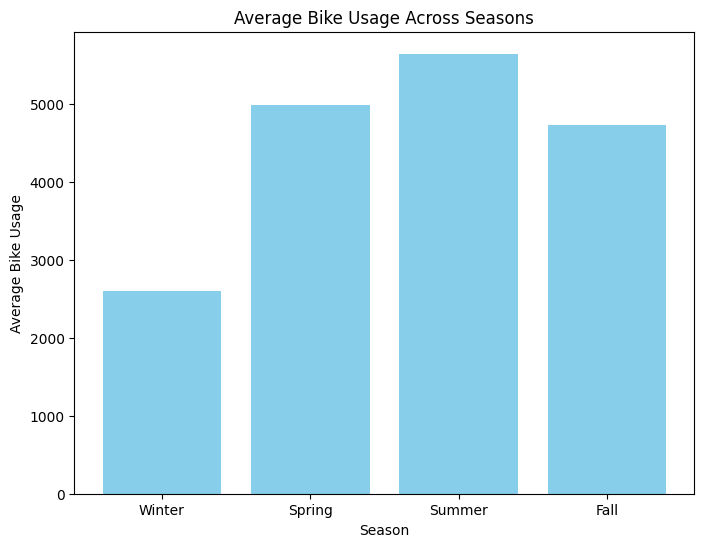

In [56]:
# Plot average bike usage by season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_usage['season'], seasonal_usage['cnt'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Bike Usage')
plt.title('Average Bike Usage Across Seasons')
plt.show()

### Pertanyaan 2: Kondisi cuaca manakah yang paling berkorelasi dengan penggunaan sepeda pada setiap musim?

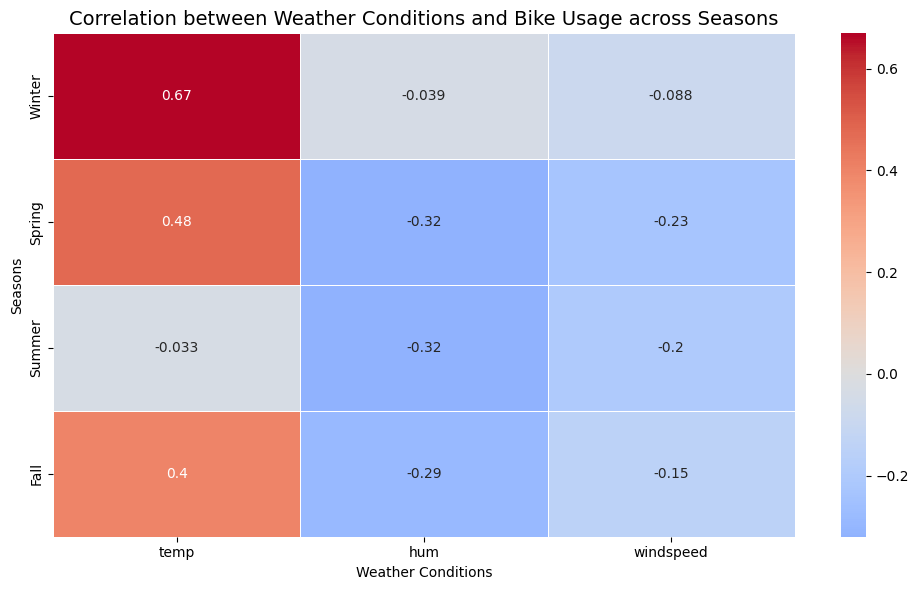

In [57]:
# Function to calculate correlation between weather variables and bike usage for each season
def calculate_correlations(df, season):
    season_data = df[df['season'] == season]
    correlations = season_data[['temp', 'hum', 'windspeed', 'cnt']].corr()['cnt'].drop('cnt')
    return correlations

# Calculate correlations for each season
correlations_by_season = {}
for season_num, season_name in season_mapping.items():
    correlations_by_season[season_name] = calculate_correlations(day_df, season_num)

# Convert the dictionary to a DataFrame for better readability
correlations_df = pd.DataFrame(correlations_by_season)

# Transpose the correlation dataframe for better visualization (seasons as columns)
correlations_transposed = correlations_df.T

# Set up the figure for plotting
plt.figure(figsize=(10, 6))
sns.heatmap(correlations_transposed, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

# Add titles and labels
plt.title('Correlation between Weather Conditions and Bike Usage across Seasons', fontsize=14)
plt.xlabel('Weather Conditions')
plt.ylabel('Seasons')
plt.tight_layout()

# Show the heatmap
plt.show()



**Insight:**

- Temperature positively correlates with bike usage, particularly in winter.
- Humidity has a consistently negative impact across all seasons.
Windspeed slightly discourages bike usage but is not a significant factor.

## Conclusion

- Penggunaan sepeda mencapai puncaknya di musim panas dengan rata-rata 5.644 pengguna, sedangkan terendah di musim dingin dengan 2.604 pengguna. Suhu yang lebih hangat meningkatkan aktivitas bersepeda, sementara musim dingin yang lebih keras menurunkannya. Musim semi dan musim gugur menunjukkan penggunaan moderat.

- Suhu memiliki korelasi positif dengan penggunaan sepeda, terutama di musim dingin, sementara kelembapan memiliki dampak negatif yang kuat, terutama di musim semi dan musim panas. Kecepatan angin menunjukkan korelasi negatif kecil.